<a href="https://colab.research.google.com/github/Pierciest/Sentimental-analysis-project/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import the libraries


In [1]:
try:
    import pandas as pd
    import matplotlib.pyplot as plt
    import wordcloud as WordCloud
    import tweepy
    from textblob import TextBlob
    import numpy as np
    import re
    from bs4 import BeautifulSoup
    import requests
    from datetime import date, timedelta, datetime
    import os.path
    import numpy
except:
    print("For the script to run please install pandas. Or you may also use 'pip install -r requirements.txt' in the command line opened inside the folder.")
    exit()
plt.style.use("fivethirtyeight")

In [2]:
def print_coin_list():
  page = 1
  currency_titles = []
  currency_titles_short = []
  topic_url = 'https://www.coingecko.com/en?page='
  E = 0
  if os.path.isfile('Currencies.csv'):
      E = 1
  else:
      E = 0
      
  if E == 0:
      while page < 101:
          url = topic_url + str(page)
          response = requests.get(url)
          page_contents = response.text
          with open('Crypto_currencies.html', 'w', encoding="utf-8") as f:
              f.write(page_contents)
          with open('Crypto_currencies.html', 'r') as f:
              html_source = f.read()
          doc = BeautifulSoup(html_source, 'html.parser')
          selection_class = "tw-hidden lg:tw-flex font-bold tw-items-center tw-justify-between"
          currency_tags = doc.find_all('a', {'class': selection_class})
          for currency in currency_tags:
              currency_titles.append(currency.text.strip("\n"))
          selection_class2 = "tw-hidden d-lg-inline font-normal text-3xs ml-2"
          currency_tags_short = doc.find_all('span', {'class': selection_class2})
          currency_sub_titles_short = []
          for currency in currency_tags_short:
              currency_titles_short.append(currency.text.strip("\n"))

          page += 1
      currencies_dict = {
          "currency": currency_titles,
          "title": currency_titles_short
      }
      currencies_df = pd.DataFrame(currencies_dict)
      print(currencies_df)
      currencies_df.to_csv('Currencies.csv')
  else:
      currencies_df = pd.read_csv("Currencies.csv")
      print(currencies_df)

In [ ]:
print_coin_list()

                    currency    title
0                    Bitcoin      BTC
1                   Ethereum      ETH
2               Binance Coin      BNB
3                     Tether     USDT
4                     Solana      SOL
...                      ...      ...
9995  Unagii Wrapped Bitcoin    UWBTC
9996           Mixty Finance      MXF
9997                  Swampy    SWAMP
9998                  Dogira   DOGIRA
9999             SafeBitcoin  SAFEBTC

[10000 rows x 2 columns]


In [3]:
Coin = input("Write the coin you want: ")
Count = 1000
year = int(datetime.today().year)
month = int(datetime.today().month)
day = int(datetime.today().day)

Write the coin you want: Ethereum


Load the api data from Login.txt

In [4]:
def login_API(login_file):
  lines = []
  with open(login_file) as f:
      lines = f.readlines()
  global api
  consumerKey = lines[0].strip("\n")
  consumerSecret = lines[1].strip("\n")
  accessToken = lines[2].strip("\n")
  accessTokenSecret = lines[3].strip("\n")
  authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
  authenticate.set_access_token(accessToken, accessTokenSecret)
  api = tweepy.API(authenticate, wait_on_rate_limit=True)

  

In [5]:
login_API("Login.txt")

FileNotFoundError: ignored

NameError: ignored

In [ ]:
CoinL = Coin
Date = date(year, month, day)


Arrange the date input by using the datetime library

In [ ]:
def daterange(Date):
  today = date.today()
  for n in range(int ((today - Date).days)+1):
    yield Date + timedelta(n)
Dates = []
for dt in daterange(Date):
  Dates.append(dt.strftime("%Y-%m-%d"))






In [ ]:
def coin_search(search_term):

  global all_tweets
  global all_users
  global Lengths
  global Length
  global Likes
  global Retweets
  global Comments
  global all_creation_date


  all_tweets = []
  all_users = []
  Lengths = []
  Length = []
  Likes = []
  Retweets = []
  all_creation_date = []
  Comments = []



  for date in Dates:
    tweets = tweepy.Cursor(api.search, q=search_term, lang ="en", since= date,tweet_mode="extended").items(Count)
  #While writing on python make api.search, api.search_tweets
    for tweet in tweets:
      all_tweets.append(tweet.full_text)
      all_users.append(tweet.user.screen_name)      all_follower_count.append(tweet.user.followers_count)
      all_creation_date.append((tweet.created_at))
      Length.append(tweet.full_text)
      Likes.append(tweet.favorite_count)  
      Retweets.append(tweet.retweet_count) 
      Comments.append(len(tweet._json['entities']['hashtags']))


    Lengths.append(len(Length))
    Length.clear()

    

  print(all_tweets)
  print(all_users)
  print(all_verified)
  print(all_follower_count)
  print(all_creation_date)
  print(Lengths)





Gather the tweets about coins and filter out any retweets "RT"

In [ ]:
search_term = "#"+ CoinL + "-filter:retweets"


In [ ]:
coin_search(search_term)

['@MetakingsAI #BSC #Solana #mtk #metaverse\n\nGood!!!!\n\n@qiyuemiaozi @qwqwqw1203 @_911007',
 'Remember when I gave you guys this sol/btc projection 6 days ago? I got another one for you! #Solana \nBtw: who is in the $sol long position I gave you yesterday? Make sure you have your take profit 1 ready! 👀🚀 https://t.co/TwLxLQycAB https://t.co/fz8V38KoAe',
 '@ayokenlabs I Think, this is very strong project\nThanks for shared this wonderful opportunity\nBest wishes for all team members,\n@Hopeyoukeepfly\n@DedenIhsan3 \n@AlfanWahyudi13\n\n$AYO #Airdrop #Solana',
 "@MetakingsAI I'm not always lucky with things like this, I hope this one changes my mindset.l keep refreshing my trust wallet \n#BSC #Solana #mtk #metakings #Metaverse\n\n@keceng666\n\n@Dino69912662\n\n@ariefairdropt",
 'it will be a huge event. Wonderful \n#Binance #Bitcoin #Crypto #CoinMarketCap #BSC #investors #DeFi #BNB #doge #dogecoin #ElonMusk #Cardano #forex #trading #Solana #ADA #investing #staking #Metaverse #blockchain

Create a dataframe to store the tweets with columns called "Tweets", "Users", "Verified", "Followers", "Creation Date".

In [ ]:
df = pd.DataFrame({"Users": all_users,"Tweets": all_tweets,"Likes": Likes,"Retweets": Retweets, "Comments": Comments}, columns=['Users','Tweets','Likes','Retweets','Comments'])


Show the first 5 rows of data

In [ ]:
df.head()
#Only to see if the program works so far

,Users,Tweets,Likes,Retweets,Comments
0,p3NnGyfMFQiBiQK,@MetakingsAI #BSC #Solana #mtk #metaverse\n\nG...,0,0,4
1,CryptoguruNL,Remember when I gave you guys this sol/btc pro...,0,0,1
2,Rioiraww1,"@ayokenlabs I Think, this is very strong proje...",0,0,2
3,stetsnk,@MetakingsAI I'm not always lucky with things ...,0,0,5
4,ImCelestie,it will be a huge event. Wonderful \n#Binance ...,0,0,26


Alternative popularity score function

In [ ]:
def GetPopularity(account):
  tweets = api.user_timeline(screen_name=account, exlude_replies = True, include_rts = False,  count = 30)
  likes = 0 
  retweets = 0  
  comments = 0 
  popularity = 0
  a = 0

  for tweet in tweets:   
      likes += tweet.favorite_count  #Likes on the last 30 tweets of some twitter account.
      retweets += tweet.retweet_count  #Retweets on the last 30 tweets of some twitter account.
      comments += len(tweet._json['entities']['hashtags'])  #Comments on the last 30 tweets of some twitter account.
  total = likes + retweets + comments

  if total <= 120:
    while a < total:
      popularity += 7.7*10**-9
      a +=1
    return popularity
  elif total > 120 and total <= 1000:
    a = 120
    popularity = 0.00000092
    while a < total:
        popularity += 2*7.7*10**-9
        a += 1
    return popularity
  elif total > 1000 and total <= 5000:
    a = 1000
    popularity = 0.00000092+880*2*7.7*10**-9
    while a < total:
      popularity += 3*7.7*10**-9
      a += 1
    return popularity
  elif total > 5000 and total <= 20000:
    a = 5000
    popularity = 1.4472*10**-5
    while a < total:
      popularity += 5*7.7*10**-9
      a += 1
    return popularity
  elif total > 20000 and total <= 50000:
    a = 20000
    popularity = 1.09644*10**-4
    while a < total:
      popularity += 6*7.7*10**-9
      a += 1
    return popularity
  elif total > 40000 and total <= 50000:
    a = 40000
    popularity = 1.495644*10**-3
    while a < total:
      popularity += 2*7.7*10**-9
      a += 1
    return popularity
  elif total > 50000 and total <= 70000:
    a = 70000
    popularity = 2.266*10**-3
    while a < total:
      popularity += 3*7.7*10**-9
      a += 1
    return popularity
  elif total > 70000 and total <= 100000:
    a = 700000
    popularity = 0.014
    while a < total:
      popularity += 1*7.7*10**-9
      a += 1
    return popularity
  elif total > 100000 and total <= 150000:
    a = 100000
    popularity = 0.016
    while a < total:
      popularity += 4*7.7*10**-9
      a += 1
    return popularity
  elif total > 150000 and total <= 200000:
    a = 200000
    popularity = 0.14
    while a < total:
      popularity += 3*7.7*10**-9
      a += 1
    return popularity
  elif total > 250000 and total <= 500000:
    a = 250000
    popularity = 0.6
    while a < total:
      popularity += 1*7.7*10**-9
      a += 1
    return popularity
  elif total > 500000 and total <= 1000000:
    a = 500000
    popularity = 0.6
    while a < total:
      popularity += 0.8*7.7*10**-9
      a += 1
    return popularity
  elif total > 1000000:
    popularity = 1
    return popularity
  

In [ ]:
def Get_ratio(Likes,Retweets,Comments):
  ratios = []
  ratio = 0
  for i in range(len(Likes)):
    if Comments[i] != 0:
      ratio = ((Likes[i]+Retweets[i])/Comments[i])
      if ratio > 1:
        ratio = 1
      ratios.append(ratio)
    else:
      ratio = 1
      append(ratio)
    ratio = 1
  return ratios



In [ ]:
ratios = Get_ratio(Likes,Retweets,Comments)

Create function to clean tweets



In [ ]:
def CleanTwt(twt):
  twt = re.sub(("#"+CoinL),CoinL, twt) #Removes the hashtag from the coinL

  twt = re.sub("#"+(CoinL[0].capitalize()+CoinL[1:len(CoinL)]),(CoinL[0].capitalize()+CoinL[1:len(CoinL)]), twt) #Removes the hashtag from the coin
  twt = re.sub("#[A-Za-z0-9]+", "", twt)#Removes any strings with a hashtag
  twt = re.sub("\\n","",twt)#removing the "\n" character
  twt = re.sub("https?:\/\/\S+","",twt) #Removes any hyperlinks
  return twt
  

Clean the tweets

In [ ]:
df["Cleaned_Tweets"] = df["Tweets"].apply(CleanTwt)

Show the dataset

In [ ]:
df.head()
#Only to see if the program works so far

,Users,Tweets,Likes,Retweets,Comments,Cleaned_Tweets
0,p3NnGyfMFQiBiQK,@MetakingsAI #BSC #Solana #mtk #metaverse\n\nG...,0,0,4,@MetakingsAI Solana Good!!!!@qiyuemiaozi @qw...
1,CryptoguruNL,Remember when I gave you guys this sol/btc pro...,0,0,1,Remember when I gave you guys this sol/btc pro...
2,Rioiraww1,"@ayokenlabs I Think, this is very strong proje...",0,0,2,"@ayokenlabs I Think, this is very strong proje..."
3,stetsnk,@MetakingsAI I'm not always lucky with things ...,0,0,5,@MetakingsAI I'm not always lucky with things ...
4,ImCelestie,it will be a huge event. Wonderful \n#Binance ...,0,0,26,it will be a huge event. Wonderful ...


Create a function to get subjectivity

In [ ]:
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity


Create a function to get the polarity

In [ ]:
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

Create two new columns called subjectivity and polarity

In [ ]:
df["Subjectivity"] = df["Cleaned_Tweets"].apply(getSubjectivity)
df["Polarity"] = df["Cleaned_Tweets"].apply(getPolarity)
Popularity = []
for account in all_users:
  Popularity.append(GetPopularity(account))
df["Popularity"] = Popularity


Show the data

In [ ]:
df.head(10)
#Only to see if the program works so far

,Users,Verified,Followers,Creation date,Tweets,Likes,Retweets,Comments,Cleaned_Tweets,Subjectivity,Polarity,Popularity
0,SleighDAO,False,293,2021-12-15 15:00:31,To celebrate the fast growth of our community ...,0,0,4,To celebrate the fast growth of our community ...,0.350000,0.250000,3.830600e-06
1,Maze_Dao,False,1100,2021-12-15 15:00:03,Hello Adventurers 👋\n\nWe have news from the d...,5,2,6,Hello Adventurers 👋We have news from the devel...,0.625000,0.625000,3.544680e-05
2,CVJournal_ch_EN,False,5429,2021-12-15 15:00:02,The #blockchain network #Avalanche is a smart ...,1,0,5,The network Avalanche is a smart contract ena...,0.527619,0.108095,3.815200e-06
3,EgbunaO06,False,136,2021-12-15 14:59:35,Plutos Network's first of a kind synthetic sys...,0,0,4,Plutos Network's first of a kind synthetic sys...,0.444444,0.283333,0.000000e+00
4,P2Eglobal,False,1744,2021-12-15 14:56:44,The USD coin (USDC) will now be on #Avalanche ...,1,1,5,"The USD coin (USDC) will now be on Avalanche ""...",0.250000,0.250000,5.617000e-06
5,Crypt0nacci,False,614,2021-12-15 14:56:00,@AvaxRarity @news_avax 🙌 Excited for #Avalanch...,3,0,2,@AvaxRarity @news_avax 🙌 Excited for Avalanche...,0.750000,0.375000,1.135600e-06
6,APalenstijn,False,80,2021-12-15 14:55:57,@vespertinecap @Dogeon_Official @Dogeon_Offici...,0,0,5,@vespertinecap @Dogeon_Official @Dogeon_Offici...,0.000000,0.000000,2.926000e-07
7,Avalanche_Space,False,51948,2021-12-15 14:52:33,🐺 @YieldWolfNews is now available on @DeBankDe...,4,4,3,🐺 @YieldWolfNews is now available on @DeBankDe...,0.400000,0.400000,3.021850e-05
8,dexscreener,False,6243,2021-12-15 14:47:54,👉 Space $SPACE / $MIM\nAvalanche - Trader Joe\...,1,1,3,👉 Space $SPACE / $MIMAvalanche - Trader Joe🟢 P...,0.066667,0.000000,6.545000e-07
9,TheGodProtocol,False,1680,2021-12-15 14:47:37,"Frens, wanna win a free Pixel Pepe NFT?! See i...",2,0,4,"Frens, wanna win a free Pixel Pepe NFT?! See i...",0.733333,0.516667,5.082000e-07


Create a function to get the sentiment text

In [ ]:
def getSentiment(score):
  if score <0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"


Create a column to store the text sentiment

In [ ]:
df["Sentiment"] = df["Polarity"].apply(getSentiment)

Show the data

In [ ]:
df.head(10)
#Only to see if the program works so far

,Users,Verified,Followers,Creation date,Tweets,Likes,Retweets,Comments,Cleaned_Tweets,Subjectivity,Polarity,Popularity,Sentiment
0,SleighDAO,False,293,2021-12-15 15:00:31,To celebrate the fast growth of our community ...,0,0,4,To celebrate the fast growth of our community ...,0.350000,0.250000,3.830600e-06,Positive
1,Maze_Dao,False,1100,2021-12-15 15:00:03,Hello Adventurers 👋\n\nWe have news from the d...,5,2,6,Hello Adventurers 👋We have news from the devel...,0.625000,0.625000,3.544680e-05,Positive
2,CVJournal_ch_EN,False,5429,2021-12-15 15:00:02,The #blockchain network #Avalanche is a smart ...,1,0,5,The network Avalanche is a smart contract ena...,0.527619,0.108095,3.815200e-06,Positive
3,EgbunaO06,False,136,2021-12-15 14:59:35,Plutos Network's first of a kind synthetic sys...,0,0,4,Plutos Network's first of a kind synthetic sys...,0.444444,0.283333,0.000000e+00,Positive
4,P2Eglobal,False,1744,2021-12-15 14:56:44,The USD coin (USDC) will now be on #Avalanche ...,1,1,5,"The USD coin (USDC) will now be on Avalanche ""...",0.250000,0.250000,5.617000e-06,Positive
5,Crypt0nacci,False,614,2021-12-15 14:56:00,@AvaxRarity @news_avax 🙌 Excited for #Avalanch...,3,0,2,@AvaxRarity @news_avax 🙌 Excited for Avalanche...,0.750000,0.375000,1.135600e-06,Positive
6,APalenstijn,False,80,2021-12-15 14:55:57,@vespertinecap @Dogeon_Official @Dogeon_Offici...,0,0,5,@vespertinecap @Dogeon_Official @Dogeon_Offici...,0.000000,0.000000,2.926000e-07,Neutral
7,Avalanche_Space,False,51948,2021-12-15 14:52:33,🐺 @YieldWolfNews is now available on @DeBankDe...,4,4,3,🐺 @YieldWolfNews is now available on @DeBankDe...,0.400000,0.400000,3.021850e-05,Positive
8,dexscreener,False,6243,2021-12-15 14:47:54,👉 Space $SPACE / $MIM\nAvalanche - Trader Joe\...,1,1,3,👉 Space $SPACE / $MIMAvalanche - Trader Joe🟢 P...,0.066667,0.000000,6.545000e-07,Neutral
9,TheGodProtocol,False,1680,2021-12-15 14:47:37,"Frens, wanna win a free Pixel Pepe NFT?! See i...",2,0,4,"Frens, wanna win a free Pixel Pepe NFT?! See i...",0.733333,0.516667,5.082000e-07,Positive


In [ ]:
print(all_creation_date[0])

2021-12-15 15:00:31


Calculating the center of mass, Since each variable is between -1 and 1 the values are extremely small. To make them larger and obtain a readable data, Popularity*Subjectivity and Popularity*Polarity is extended by 10^3

In [ ]:

Polarity = []
for i in df["Polarity"]:
  Polarity.append(i)
Subjectivity = []
for i in df["Subjectivity"]:
  Subjectivity.append(i)

Center_of_Mass = []

Popularity_Total = 0
d = 0
c = 0
for i in Lengths:
  Popularity_divided = Popularity[d:d+i]
  Polarity_divided = Polarity[d:d+i]
  Subjectivity_divided = Subjectivity[d:d+i]
  for a in range(len(Popularity_divided)):
    if (Popularity_divided[a]*Polarity_divided[a]*Subjectivity_divided[a]) < 0:
      Center_of_Mass.append((Popularity_divided[a]*Polarity_divided[a]*Subjectivity_divided[a])*10**8)
    else:
      Center_of_Mass.append((Popularity_divided[a]*Polarity_divided[a]*Subjectivity_divided[a])*10**8)




  d += i
  for mass in Center_of_Mass:
    for ratio in ratios:
      mass = mass*ratio


  Popularity_Total = 0
print(Center_of_Mass)

[0.0, 8.67790000000001, 0.0, 0.0, 63.2282, 4.62, 3.614722222222222, 2.9645000000000037, 0.6851796875000001, 0.0, 0.43312500000000004, 15.707999999999997, 1.7787000000000006, 2.9106000000000005, 0.0, 0.9625000000000001, -0.17130123456790125, 0.0, 0.0, 0.0, 0.0, 3.1634166666666657, 6.1446, 0.4620000000000001, 3.306775694444444, 1.0176833333333335, 3.2724999999999995, 2.4192638020833326, 7.7, 0.0, 0.0, 7.229444444444444, 8.523899999999996, 7.392000000000016, 0.0, 1.7830312500000003, 1.6170000000000004, 0.0, 2.0212500000000007, 0.4111078125000001, -0.21586934156378607, 16.776826171875047, 0.7700000000000001, 0.0, 0.0, 1.0322812500000003, 0.7623000000000002, 0.0, 1.6021775, 0.0, 194.2999999999992, 0.0, 1.1763888888888892, 0.6758888888888896, 0.0, 0.27720000000000006, 0.23100000000000004, 0.0, 239.68535629017344, 14.552999999999995, 2.232685714285714, 0.0, 0.0, 1.0059432098765433, 0.0, 0.0, 7.340666666666664, -1.1202000000000008, 8.662499999999998, 0.7315, 1.4704861111111116, 34.507824000000

In [ ]:
times = []
for i in all_creation_date:
  times.append((i.strftime('%H-%M-%S')))
print(len(times))


0


In [ ]:
times = []
for i in all_creation_date:
  hour = i.hour
  minute = i.minute
  second = i.second

  times.append(hour+minute/60+second/3600)
print(times)

[]


In [ ]:
print(len(Center_of_Mass),len(times))

1000 0


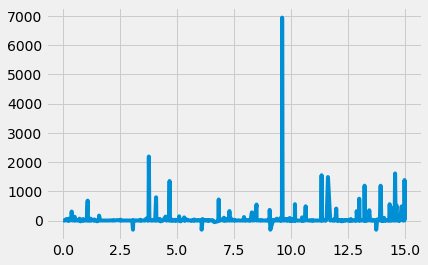

In [ ]:
y = Center_of_Mass
x = times
plt.plot(x, y)

In [ ]:
total = 0
for data in Center_of_Mass:
  total += data
avarage = total/(len(Center_of_Mass))
print(avarage)


53.82030882735773


In [ ]:
currency_changes = []
url = "https://coinmarketcap.com/tr/currencies/avalanche/"
response = requests.get(url)
page_contents = response.text
with open('currency.html', 'w', encoding="utf-8") as f:
  f.write(page_contents)
with open('currency.html', 'r') as f:
  html_source = f.read()
doc = BeautifulSoup(html_source, 'html.parser')
selection_class = "sc-15yy2pl-0 gEePkg"
currency_change = doc.find_all('span', {'class': selection_class})
for change in currency_change:
  currency_changes.append(change.text.strip("\n"))

daily_change_t = currency_changes[0].strip("%")
temp10 = daily_change_t.split(".")
daily_change = int(temp10[0])+int(temp10[1])/100


In [ ]:
total = 0
Estimation_t = Center_of_Mass[len(Center_of_Mass)-50:len(Center_of_Mass)]
for estimation in Estimation_t:
  total += estimation
Estimation = total/50
Estimation = Estimation*(daily_change/avarage)
print("Expected change in 1 hour is, %{}".format(Estimation))

Expected change in 1 hour is, %5.713266353450025


A scatter plot to see the data un organised

Create a bar chart to show the count of negative positive and neutral tweets

A scatter plot to see the data in a more readable way.